Geographical Anaylsis

In [17]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
import mapclassify as mc
import numpy as np
from skimpy import clean_columns

In [18]:
# Clean Data
def read_csv(filename):
    df = pd.read_csv(f"dat/{filename}")
    df = clean_columns(df)
    return df

sb_ratings = read_csv('super-bowl-ratings.csv')
sb_dat = read_csv('superbowl_2.csv')
sb_off_stats = read_csv('superbowloffensivestats.csv')
sb_mvps = read_csv('mvpsb.csv')
sb_cities = read_csv('city_data.csv')
state_temp = read_csv('temperature.csv')

print(sb_cities.head(5))

to_short_name = {
    'Baltimore Colts': "IND",
    'Baltimore Ravens': "BAL",
    'Chicago Bears': "CHI",
    'Dallas Cowboys': "DAL",
    'Denver Broncos': "DEN",
    'Green Bay Packers': "GNB",
    'Indianapolis Colts': "IND",
    'Kansas City Chiefs':"KAN",
    'Los Angeles Raiders': "LAR",
    'Los Angeles Rams': "RAM", 
    'Miami Dolphins': "MIA",
    'New England Patriots': "NWE",
    'New Orleans Saints': "NOR",
    'New York Giants': "NYG",
    'New York Jets': "NYJ",
    'Oakland Raiders': "OAK",
    'Philadelphia Eagles': "PHI",
    'Pittsburgh Steelers': "PIT",
    'San Francisco 49ers': "SFO",
    'Seattle Seahawks': "SEA",
    'St. Louis Rams': "RAM",
    'Tampa Bay Buccaneers': "TAM",
    'Washington Redskins': "WAS",
    'Arizona Cardinals' : "ARI",
    'Atlanta Falcons': "ATL",
    'Buffalo Bills': "BUF",
    'Carolina Panthers': "CAR",
    'Cincinnati Bengals': "CIN",
    'Minnesota Vikings': "MIN",
    'San Diego Chargers': "SDG",
    'Tennessee Titans': "TEN"
}
to_short_names_mvps = {
    'Baltimore' : "BAL",
    'Chicago' : "CHI",
    'Dallas': "DAL",
    'Denver': "DEN",
    'Green Bay': "GNB",
    'Indianapolis': "IND",
    'Kansas City': "KAN",
    'Los Angeles Raiders': "LAR",
    'Miami': "MIA",
    'New England': "NWE",
    'New Orleans': "NOR",
    'New York Giants': "NYG",
    'New York Jets': "NYJ",
    'Oakland': "OAK",
    'Philadelphia': "PHI",
    'Pittsburgh': "PIT",
    'San Francisco': "SFO",
    'Seattle': "SEA",
    'St. Louis': "RAM",
    'Tampa Bay': "TAM",
    'Washington': "WAS"
}

sb_dat.replace(to_replace=to_short_name.keys(), value=to_short_name.values(), inplace=True)
sb_mvps.replace(to_replace=to_short_names_mvps.keys(), value=to_short_names_mvps.values(), inplace=True)

          city       state        lat         lon
0  Los Angeles  California  34.052234 -118.243685
1        Miami     Florida  25.761680  -80.191790
2  New Orleans   Louisiana  29.951066  -90.071532
3      Houston       Texas  29.760427  -95.369803
4     Pasadena  California  34.147785 -118.144515


<Axes: >

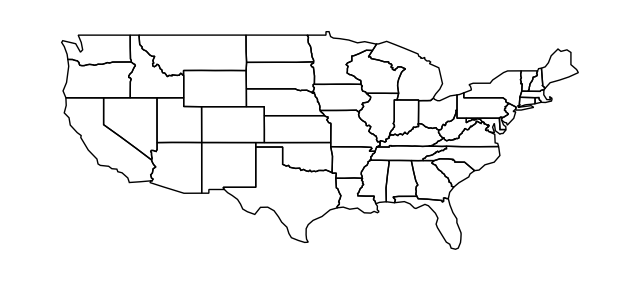

In [19]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

gplt.polyplot(contiguous_usa)


<Axes: >

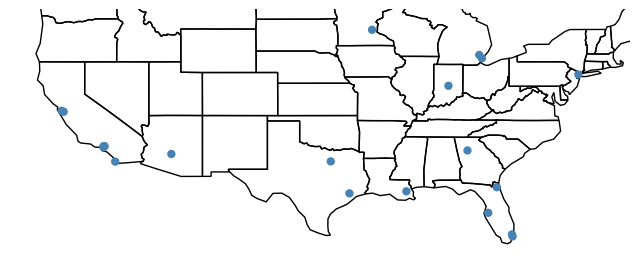

In [20]:
gdf = gpd.GeoDataFrame(
    sb_cities.city, geometry=gpd.points_from_xy(sb_cities.lon, sb_cities.lat)
)
gdf.head(5)
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(gdf, ax = ax)


Index(['state', 'adm1_code', 'population', 'geometry'], dtype='object')
Index(['state', 'average_temperature'], dtype='object')


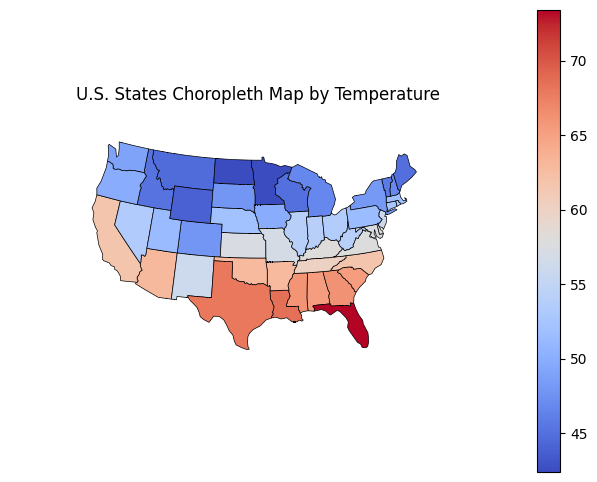

In [49]:
path = gplt.datasets.get_path("contiguous_usa")
usa_states = gpd.read_file(path)

print(usa_states.columns)
print(state_temp.columns)

merged_data = usa_states.merge(state_temp, left_on='state', right_on='state')

ax = gplt.choropleth(
    merged_data,
    hue='average_temperature',
    legend=True,
    edgecolor='k',
    linewidth=0.5,
    cmap='coolwarm',
    projection=gcrs.AlbersEqualArea()
)

plt.title('U.S. States Choropleth Map by Temperature')
plt.show()